# **LSTM Price Movement Predictions For Trading Algorithms**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

# Define the ticker symbol for Apple Inc.
chosen_stock = 'AAPL'

# Use yfinance to download the stock data
stock_data = yf.download(chosen_stock, start='2015-01-01', end='2024-10-01', interval='1d')

# Display the first few rows of the data
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700
2024-09-27,228.460007,229.520004,227.300003,227.789993,227.789993,34026000
2024-09-30,230.039993,233.000000,229.649994,233.000000,233.000000,54541900


In [2]:
# Adding indicators
stock_data['RSI']=ta.rsi(stock_data.Close, length=15)
stock_data['EMAF']=ta.ema(stock_data.Close, length=20)
stock_data['EMAM']=ta.ema(stock_data.Close, length=100)
stock_data['EMAS']=ta.ema(stock_data.Close, length=150)

stock_data['Target'] = stock_data['Adj Close']-stock_data.Open
stock_data['Target'] = stock_data['Target'].shift(-1)

#stock_data['TargetClass'] = [1 if stock_data.Target[i]>0 else 0 for i in range(len(stock_data))]
stock_data['TargetClass'] = [1 if stock_data['Target'].iloc[i] > 0 else 0 for i in range(len(stock_data))]


stock_data['TargetNextClose'] = stock_data['Adj Close'].shift(-1)

stock_data.dropna(inplace=True)
stock_data.reset_index(inplace = True)
stock_data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [3]:
data_set = stock_data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,28.992500,29.125000,28.530001,25.993063,29.614380,30.494932,31.123954,31.080817,-2.563883,0,26.081118
1,28.645000,29.062500,28.625000,26.081118,30.973280,30.341128,31.079519,31.051667,-2.103138,0,27.029362
2,29.132500,29.997499,29.132500,27.029362,43.548797,30.301973,31.056757,31.036810,-3.829700,0,25.622799
3,29.452499,29.545000,28.332500,25.622799,33.770768,30.118214,31.003603,31.001521,-2.114595,0,26.017904
4,28.132500,28.855000,27.407499,26.017904,37.962943,29.993622,30.960165,30.972495,-3.012421,0,25.997580
5,29.010000,29.100000,28.635000,25.997580,37.830999,29.878753,30.917142,30.943554,-2.399546,0,26.180454
6,28.580000,29.077499,28.502501,26.180454,39.847073,29.794110,30.878981,30.917679,-2.558613,0,26.451387
7,29.010000,29.412500,28.875000,26.451387,42.791853,29.746100,30.847516,30.896121,-2.805128,0,26.302372
8,29.107500,29.360001,29.002501,26.302372,41.591988,29.686947,30.813407,30.872662,-3.059029,0,25.965971
9,29.025000,29.129999,28.670000,25.965971,38.950282,29.597952,30.772597,30.844580,-3.086847,0,25.433153


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.03034162 0.02896472 0.02924463 ... 0.30808163 0.         0.0250719 ]
 [0.02871764 0.02867309 0.02969545 ... 0.32822762 0.         0.0295065 ]
 [0.03099589 0.03303587 0.03210383 ... 0.25273397 0.         0.0229285 ]
 ...
 [0.94602298 0.95361912 0.95695765 ... 0.42980649 1.         0.96713011]
 [0.95709883 0.95926511 0.963554   ... 0.39089075 0.         0.96839275]
 [0.96251991 0.96402454 0.97252314 ... 0.54961276 1.         0.99275811]]


In [24]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2302
[[[0.03034162 0.02896472 0.02924463 ... 0.03273377 0.03337021 0.0315731 ]
  [0.02871764 0.02867309 0.02969545 ... 0.0319672  0.03313476 0.03141282]
  [0.03099589 0.03303587 0.03210383 ... 0.03177205 0.03301414 0.03133114]
  ...
  [0.03042341 0.03030622 0.03088185 ... 0.02900153 0.03190539 0.03055756]
  [0.03087906 0.03006125 0.03148691 ... 0.02870671 0.03172464 0.03042857]
  [0.0304935  0.02898804 0.029909   ... 0.02826316 0.03150839 0.03027417]]

 [[0.02871764 0.02867309 0.02969545 ... 0.0319672  0.03313476 0.03141282]
  [0.03099589 0.03303587 0.03210383 ... 0.03177205 0.03301414 0.03133114]
  [0.03249135 0.03092447 0.02830737 ... 0.03085618 0.03273248 0.0311371 ]
  ...
  [0.03087906 0.03006125 0.03148691 ... 0.02870671 0.03172464 0.03042857]
  [0.0304935  0.02898804 0.029909   ... 0.02826316 0.03150839 0.03027417]
  [0.02813347 0.02645669 0.0262905  ... 0.02758178 0.03123452 0.03007884]]

 [[0.03099589 0.03303587 0.03210383 ... 0.03177205 0.03301414 0.03133114]
  [0.03249135 0.0

In [26]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1833
(1833, 10, 8)
(459, 10, 8)
(1833, 1)
(459, 1)
[[0.01476675]
 [0.01197933]
 [0.01263395]
 ...
 [0.57128102]
 [0.55715018]
 [0.58893304]]


In [18]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0071 - val_loss: 8.2961e-04
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7930e-04 - val_loss: 7.2971e-04
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5820e-04 - val_loss: 8.8713e-04
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7515e-04 - val_loss: 8.3053e-04
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4456e-04 - val_loss: 7.6115e-04
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.4094e-04 - val_loss: 6.7900e-04
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.5467e-04 - val_loss: 5.8923e-04
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5531e-04 - val_loss: 7.5757e-04
Epoch 9/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.3330e-04 - val_loss: 5.9104e-04
Epoch 10/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.4450e-04 - val_loss: 6.9686e-04
Epoch 11/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

In [20]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
[0.5750983] [0.55608463]
[0.5639993] [0.56400701]
[0.55451334] [0.56173691]
[0.55713916] [0.57253203]
[0.5564585] [0.57707231]
[0.56165546] [0.56660166]
[0.5698118] [0.53551377]
[0.562164] [0.52629393]
[0.5410956] [0.51637932]
[0.52951396] [0.51605492]


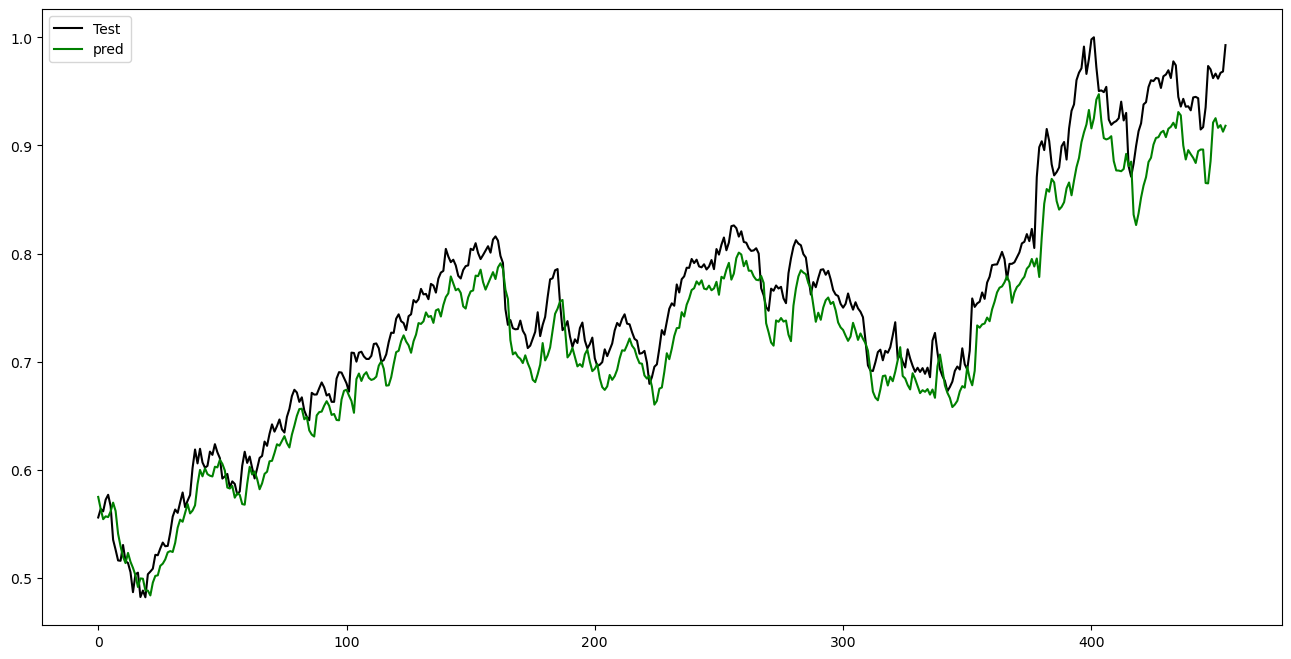

In [22]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

**Compare to the previous approaches we noticed that here we have a nice prediction and a simmilar cuves**